In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:

df = pd.read_csv('student_depression_dataset.csv')
df.head(2)

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0


In [3]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [4]:
df.isnull().sum()

id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64

In [6]:
df['Depression'].value_counts()

Depression
1    16336
0    11565
Name: count, dtype: int64

In [60]:
df.drop(['id'],axis=1,inplace=True)

In [61]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [62]:
df['Age'].unique()

array([33., 24., 31., 28., 25., 29., 30., 27., 19., 20., 23., 18., 21.,
       22., 34., 32., 26., 39., 35., 42., 36., 58., 49., 38., 51., 44.,
       43., 46., 59., 54., 48., 56., 37., 41.])

In [63]:
df['Age'] = df['Age'].astype('int')

In [64]:
df['City'].unique()

array(['Visakhapatnam', 'Bangalore', 'Srinagar', 'Varanasi', 'Jaipur',
       'Pune', 'Thane', 'Chennai', 'Nagpur', 'Nashik', 'Vadodara',
       'Kalyan', 'Rajkot', 'Ahmedabad', 'Kolkata', 'Mumbai', 'Lucknow',
       'Indore', 'Surat', 'Ludhiana', 'Bhopal', 'Meerut', 'Agra',
       'Ghaziabad', 'Hyderabad', 'Vasai-Virar', 'Kanpur', 'Patna',
       'Faridabad', 'Delhi', 'Saanvi', 'M.Tech', 'Bhavna', "'Less Delhi'",
       'City', '3.0', "'Less than 5 Kalyan'", 'Mira', 'Harsha', 'Vaanya',
       'Gaurav', 'Harsh', 'Reyansh', 'Kibara', 'Rashi', 'ME', 'M.Com',
       'Nalyan', 'Mihir', 'Nalini', 'Nandini', 'Khaziabad'], dtype=object)

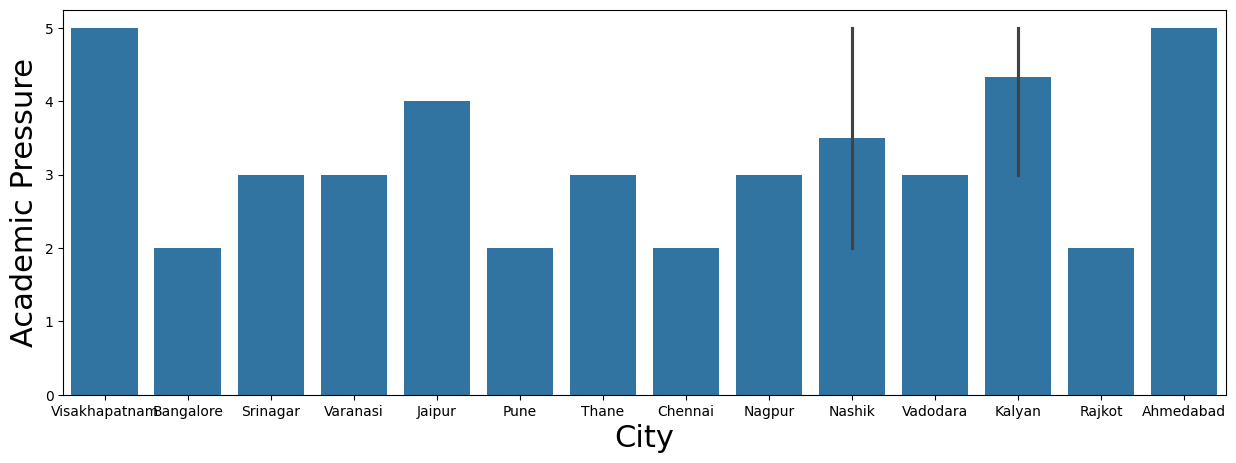

In [65]:
plt.figure(figsize=(15,5))
sns.barplot(x='City',y='Academic Pressure',data=df[:20])
plt.xlabel('City',size=22)
plt.ylabel('Academic Pressure',size=22)
plt.show()

In [66]:
df['City'].value_counts()[:40]

City
Kalyan           1570
Srinagar         1372
Hyderabad        1340
Vasai-Virar      1290
Lucknow          1155
Thane            1139
Ludhiana         1111
Agra             1094
Surat            1078
Kolkata          1066
Jaipur           1036
Patna            1007
Visakhapatnam     969
Pune              968
Ahmedabad         951
Bhopal            934
Chennai           885
Meerut            825
Rajkot            816
Delhi             768
Bangalore         767
Ghaziabad         745
Mumbai            699
Vadodara          694
Varanasi          685
Nagpur            651
Indore            643
Kanpur            609
Nashik            547
Faridabad         461
Saanvi              2
Bhavna              2
City                2
Harsha              2
Kibara              1
Nandini             1
Nalini              1
Mihir               1
Nalyan              1
M.Com               1
Name: count, dtype: int64

In [67]:
df['Work Pressure'].unique()

array([0., 5., 2.])

In [68]:
df['Work Pressure'].value_counts()

Work Pressure
0.0    27898
5.0        2
2.0        1
Name: count, dtype: int64

In [69]:
df['CGPA'].unique()

array([ 8.97  ,  5.9   ,  7.03  ,  5.59  ,  8.13  ,  5.7   ,  9.54  ,
        8.04  ,  9.79  ,  8.38  ,  6.1   ,  7.04  ,  8.52  ,  5.64  ,
        8.58  ,  6.51  ,  7.25  ,  7.83  ,  9.93  ,  8.74  ,  6.73  ,
        5.57  ,  8.59  ,  7.1   ,  6.08  ,  5.74  ,  9.86  ,  6.7   ,
        6.21  ,  5.87  ,  6.37  ,  9.72  ,  5.88  ,  9.56  ,  6.99  ,
        5.24  ,  9.21  ,  7.85  ,  6.95  ,  5.86  ,  7.92  ,  9.66  ,
        8.94  ,  9.71  ,  7.87  ,  5.6   ,  7.9   ,  5.46  ,  6.79  ,
        8.7   ,  7.38  ,  8.5   ,  7.09  ,  9.82  ,  8.89  ,  7.94  ,
        9.11  ,  6.75  ,  7.53  ,  9.49  ,  9.01  ,  7.64  ,  5.27  ,
        6.    ,  9.44  ,  5.75  ,  7.51  ,  9.05  ,  6.38  ,  8.95  ,
        9.88  ,  5.32  ,  6.27  ,  7.7   ,  8.1   ,  9.59  ,  8.96  ,
        5.51  ,  7.43  ,  8.79  ,  9.95  ,  5.37  ,  6.86  ,  8.32  ,
        9.74  ,  5.66  ,  7.48  ,  8.23  ,  8.81  ,  6.03  ,  5.56  ,
        5.68  ,  5.14  ,  7.61  ,  6.17  ,  8.17  ,  9.87  ,  8.75  ,
        6.16  ,  9.5

In [70]:
df['CGPA'].value_counts()

CGPA
8.04    821
9.96    425
5.74    410
8.95    371
9.21    343
       ... 
7.65      1
6.77      1
8.26      1
7.23      1
6.09      1
Name: count, Length: 332, dtype: int64

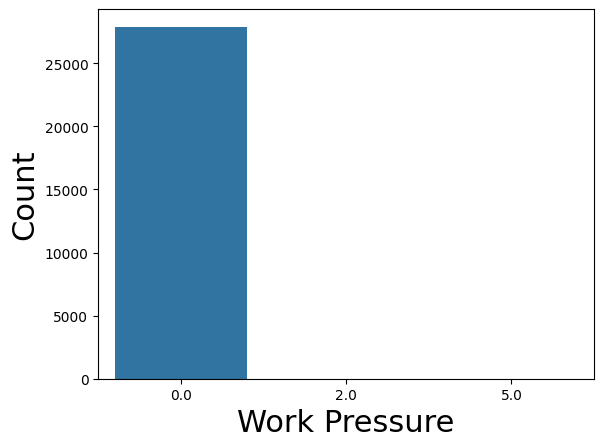

In [71]:
sns.countplot(x='Work Pressure',data=df)
plt.xlabel("Work Pressure",size=22)
plt.ylabel("Count",size=22)
plt.show()

In [72]:
df['Profession'].unique()


array(['Student', "'Civil Engineer'", 'Architect', "'UX/UI Designer'",
       "'Digital Marketer'", "'Content Writer'",
       "'Educational Consultant'", 'Teacher', 'Manager', 'Chef', 'Doctor',
       'Lawyer', 'Entrepreneur', 'Pharmacist'], dtype=object)

In [73]:
def clean_category(cat):
    return cat.strip("'") 

df['Profession'] = df['Profession'].apply(clean_category)

In [74]:
df['Study Satisfaction'].unique()

array([2., 5., 3., 4., 1., 0.])

In [75]:

df['Study Satisfaction'].value_counts()

Study Satisfaction
4.0    6359
2.0    5838
3.0    5821
1.0    5451
5.0    4422
0.0      10
Name: count, dtype: int64

In [76]:
df['Job Satisfaction'].unique()

array([0., 3., 4., 2., 1.])

In [77]:

df['Job Satisfaction'].value_counts()

Job Satisfaction
0.0    27893
2.0        3
4.0        2
1.0        2
3.0        1
Name: count, dtype: int64

In [78]:
df.drop(['Job Satisfaction'],axis=1,inplace=True)

In [79]:

df['Sleep Duration'].unique()

array(["'5-6 hours'", "'Less than 5 hours'", "'7-8 hours'",
       "'More than 8 hours'", 'Others'], dtype=object)

In [80]:
df['Sleep Duration'].value_counts()

Sleep Duration
'Less than 5 hours'    8310
'7-8 hours'            7346
'5-6 hours'            6183
'More than 8 hours'    6044
Others                   18
Name: count, dtype: int64

In [81]:
def clean_category(cat):
    return cat.strip("'") 

df['Sleep Duration'] = df['Sleep Duration'].apply(clean_category)

In [82]:
df['Dietary Habits'].unique()

array(['Healthy', 'Moderate', 'Unhealthy', 'Others'], dtype=object)

In [83]:

df['Dietary Habits'].value_counts()

Dietary Habits
Unhealthy    10317
Moderate      9921
Healthy       7651
Others          12
Name: count, dtype: int64

In [84]:
df['Degree'].unique()

array(['B.Pharm', 'BSc', 'BA', 'BCA', 'M.Tech', 'PhD', "'Class 12'",
       'B.Ed', 'LLB', 'BE', 'M.Ed', 'MSc', 'BHM', 'M.Pharm', 'MCA', 'MA',
       'B.Com', 'MD', 'MBA', 'MBBS', 'M.Com', 'B.Arch', 'LLM', 'B.Tech',
       'BBA', 'ME', 'MHM', 'Others'], dtype=object)

In [85]:

df['Degree'].value_counts()

Degree
'Class 12'    6080
B.Ed          1867
B.Com         1506
B.Arch        1478
BCA           1433
MSc           1190
B.Tech        1152
MCA           1044
M.Tech        1022
BHM            925
BSc            888
M.Ed           821
B.Pharm        810
M.Com          734
MBBS           696
BBA            696
LLB            671
BE             613
BA             600
M.Pharm        582
MD             572
MBA            562
MA             544
PhD            522
LLM            482
MHM            191
ME             185
Others          35
Name: count, dtype: int64

In [86]:

df.head()

,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,33,Visakhapatnam,Student,5.0,0.0,8.97,2.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,Female,24,Bangalore,Student,2.0,0.0,5.90,5.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,Male,31,Srinagar,Student,3.0,0.0,7.03,5.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,Female,28,Varanasi,Student,3.0,0.0,5.59,2.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,Female,25,Jaipur,Student,4.0,0.0,8.13,3.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [87]:

df['Have you ever had suicidal thoughts ?'].unique()

array(['Yes', 'No'], dtype=object)

In [88]:
df['Work/Study Hours'].unique()

array([ 3.,  9.,  4.,  1.,  0., 12.,  2., 11., 10.,  6.,  8.,  5.,  7.])

In [89]:
df['Work/Study Hours'] = df['Work/Study Hours'].astype('int')

In [90]:
df['Financial Stress'].unique()

array(['1.0', '2.0', '5.0', '3.0', '4.0', '?'], dtype=object)

In [91]:
df['Financial Stress'].value_counts()

Financial Stress
5.0    6715
4.0    5775
3.0    5226
1.0    5121
2.0    5061
?         3
Name: count, dtype: int64

In [92]:

df['Financial Stress'] = df['Financial Stress'].str.replace("?","2.0")

In [93]:
df['Family History of Mental Illness'].unique()

array(['No', 'Yes'], dtype=object)

In [94]:
df['Family History of Mental Illness'].value_counts()

Family History of Mental Illness
No     14398
Yes    13503
Name: count, dtype: int64

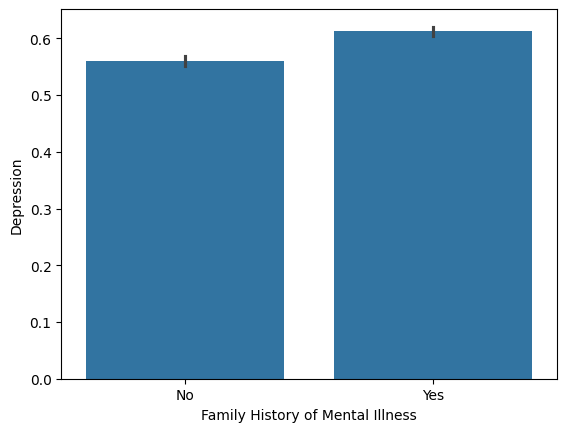

In [95]:
sns.barplot(x='Family History of Mental Illness',y='Depression',data=df)
plt.show()

In [96]:
degree = df['Degree'].value_counts()
degree = degree[degree>500]

In [97]:
def function(text):
    if text in degree:
        return text
    else:
        return "Others Degree"
    
df['Degree'] = df['Degree'].apply(function)

In [98]:
city = df['City'].value_counts()
city = city[city>500]

In [99]:
def function(text):
    if text in city:
        return text
    else:
        return "Other_Citys"
    
df['City'] = df['City'].apply(function)


In [100]:
df.head()

,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,33,Visakhapatnam,Student,5.0,0.0,8.97,2.0,5-6 hours,Healthy,B.Pharm,Yes,3,1.0,No,1
1,Female,24,Bangalore,Student,2.0,0.0,5.90,5.0,5-6 hours,Moderate,BSc,No,3,2.0,Yes,0
2,Male,31,Srinagar,Student,3.0,0.0,7.03,5.0,Less than 5 hours,Healthy,BA,No,9,1.0,Yes,0
3,Female,28,Varanasi,Student,3.0,0.0,5.59,2.0,7-8 hours,Moderate,BCA,Yes,4,5.0,Yes,1
4,Female,25,Jaipur,Student,4.0,0.0,8.13,3.0,5-6 hours,Moderate,M.Tech,Yes,1,1.0,No,0


In [101]:
df.drop(['Work Pressure'],axis=1,inplace=True)

In [102]:
df.head()

,Gender,Age,City,Profession,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,33,Visakhapatnam,Student,5.0,8.97,2.0,5-6 hours,Healthy,B.Pharm,Yes,3,1.0,No,1
1,Female,24,Bangalore,Student,2.0,5.90,5.0,5-6 hours,Moderate,BSc,No,3,2.0,Yes,0
2,Male,31,Srinagar,Student,3.0,7.03,5.0,Less than 5 hours,Healthy,BA,No,9,1.0,Yes,0
3,Female,28,Varanasi,Student,3.0,5.59,2.0,7-8 hours,Moderate,BCA,Yes,4,5.0,Yes,1
4,Female,25,Jaipur,Student,4.0,8.13,3.0,5-6 hours,Moderate,M.Tech,Yes,1,1.0,No,0


In [103]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


onehot = OneHotEncoder()
hotter_encoder = onehot.fit_transform(df[['City','Profession','Sleep Duration','Degree']]).toarray()

ordinal = OrdinalEncoder()
ordinal_encoder = ordinal.fit_transform(df[['Gender','Dietary Habits','Have you ever had suicidal thoughts ?','Family History of Mental Illness']])


In [104]:
hotter_encoder

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [105]:
ordinal_encoder

array([[1., 0., 1., 0.],
       [0., 1., 0., 1.],
       [1., 0., 0., 1.],
       ...,
       [1., 3., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 1., 1.]])

In [106]:
df2 = df.copy()

In [107]:
df2.head()

,Gender,Age,City,Profession,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,33,Visakhapatnam,Student,5.0,8.97,2.0,5-6 hours,Healthy,B.Pharm,Yes,3,1.0,No,1
1,Female,24,Bangalore,Student,2.0,5.90,5.0,5-6 hours,Moderate,BSc,No,3,2.0,Yes,0
2,Male,31,Srinagar,Student,3.0,7.03,5.0,Less than 5 hours,Healthy,BA,No,9,1.0,Yes,0
3,Female,28,Varanasi,Student,3.0,5.59,2.0,7-8 hours,Moderate,BCA,Yes,4,5.0,Yes,1
4,Female,25,Jaipur,Student,4.0,8.13,3.0,5-6 hours,Moderate,M.Tech,Yes,1,1.0,No,0


In [108]:
df2.drop(['Gender','City','Profession','Sleep Duration','Dietary Habits','Degree','Have you ever had suicidal thoughts ?','Family History of Mental Illness'],axis=1,inplace=True)

In [109]:
df2.head()

,Age,Academic Pressure,CGPA,Study Satisfaction,Work/Study Hours,Financial Stress,Depression
0,33,5.0,8.97,2.0,3,1.0,1
1,24,2.0,5.90,5.0,3,2.0,0
2,31,3.0,7.03,5.0,9,1.0,0
3,28,3.0,5.59,2.0,4,5.0,1
4,25,4.0,8.13,3.0,1,1.0,0


In [ ]:
input = df2.drop(['Depression'],axis=1)
input = input.values
input

array([[33, 5.0, 8.97, 2.0, 3, '1.0'],
       [24, 2.0, 5.9, 5.0, 3, '2.0'],
       [31, 3.0, 7.03, 5.0, 9, '1.0'],
       ...,
       [31, 3.0, 6.61, 4.0, 12, '2.0'],
       [18, 5.0, 6.88, 2.0, 10, '5.0'],
       [27, 4.0, 9.24, 1.0, 2, '3.0']], dtype=object)

In [119]:
X = np.hstack((hotter_encoder,ordinal_encoder))

In [121]:
Y = df2['Depression']

In [123]:
scaler = StandardScaler()
x_scaler = scaler.fit_transform(X)
x_scaler

array([[-0.20201544, -0.18784986, -0.16812828, ..., -1.1823635 ,
         0.76174537, -0.96842067],
       [-0.20201544, -0.18784986,  5.94783933, ..., -0.37570456,
        -1.31277464,  1.03260911],
       [-0.20201544, -0.18784986, -0.16812828, ..., -1.1823635 ,
        -1.31277464,  1.03260911],
       ...,
       [-0.20201544, -0.18784986, -0.16812828, ...,  1.23761332,
        -1.31277464, -0.96842067],
       [-0.20201544, -0.18784986, -0.16812828, ..., -1.1823635 ,
         0.76174537, -0.96842067],
       [-0.20201544, -0.18784986, -0.16812828, ..., -1.1823635 ,
         0.76174537,  1.03260911]])

In [128]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x_scaler,Y,test_size=0.2,random_state=12)

In [129]:

x_train

array([[-0.20201544,  5.32340032, -0.16812828, ..., -0.37570456,
        -1.31277464, -0.96842067],
       [-0.20201544, -0.18784986, -0.16812828, ..., -1.1823635 ,
         0.76174537,  1.03260911],
       [-0.20201544, -0.18784986, -0.16812828, ..., -1.1823635 ,
         0.76174537,  1.03260911],
       ...,
       [-0.20201544, -0.18784986, -0.16812828, ..., -0.37570456,
        -1.31277464,  1.03260911],
       [-0.20201544, -0.18784986, -0.16812828, ..., -0.37570456,
         0.76174537,  1.03260911],
       [-0.20201544, -0.18784986, -0.16812828, ..., -0.37570456,
         0.76174537,  1.03260911]])

In [130]:
y_train

26975    0
10865    0
1381     1
16550    1
6633     0
        ..
7409     1
19709    0
25990    0
5787     1
14155    1
Name: Depression, Length: 22320, dtype: int64

In [127]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression


In [131]:
from sklearn.metrics import accuracy_score

random = RandomForestClassifier()
random.fit(x_train,y_train)
y_pred = random.predict(x_test)
accuracy_score(y_test,y_pred)

0.7418025443468912